## Unsupervised Learning - Association Rules

### Analyse the movies data and help film distribution company to understand viewers choice of movies.

Data: 10 different movies watched by 5 viewers.

Description: A total of 10 rows of data for 10 unique movies. (Very few rows of data to analyse)

In [1]:
# import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the data file
movies_df  = pd.read_csv(r"D:\360digi\DS\Sharath\Association_Rules_2\handson\Association_Rules-Assignment_Datasets\my_movies.csv")
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
movies_df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
movies_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [6]:
# drop the 5 viewers column data.
movies_df = movies_df.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis = 1)
movies_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [8]:
## Elementary Analysis 
# Most popular movies
count = movies_df.loc[:,:].sum()
print(count)

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64


In [9]:
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

Gladiator        7
Sixth Sense      6
Patriot          6
LOTR1            2
Harry Potter1    2
LOTR2            2
Green Mile       2
Harry Potter2    1
LOTR             1
Braveheart       1
dtype: int64

In [10]:
pop_item = pop_item.to_frame()
pop_item

,0
Gladiator,7
Sixth Sense,6
Patriot,6
LOTR1,2
Harry Potter1,2
LOTR2,2
Green Mile,2
Harry Potter2,1
LOTR,1
Braveheart,1


In [11]:
pop_item = pop_item.reset_index()
pop_item

,index,0
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


In [12]:
pop_item = pop_item.rename(columns = {"index": "movie_name", 0: "count"})
pop_item

,movie_name,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


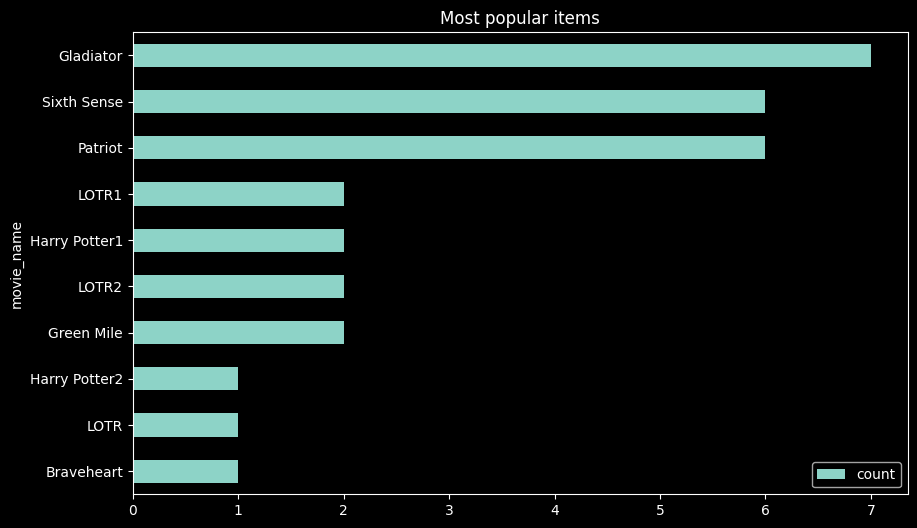

In [13]:
# Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6) # rc stands for runtime configuration 
matplotlib.style.use('dark_background')
ax = pop_item.plot.barh(x = 'movie_name', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis() # gca means "get current axes"

In [14]:
# The most popularly viewed movies are Gladiator, Sixth Sense, Patriot.
# The least watched movies are Braveheart, LOTR, Harry Potter 2.

### Apriori Algorithm

In [15]:
#Itemsets
frequent_itemsets = apriori(movies_df, min_support = 0.07, max_len = 4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [16]:
frequent_itemsets.shape

(52, 2)

In [17]:
# Most frequent itemsets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Patriot, Gladiator)"
10,0.5,"(Sixth Sense, Gladiator)"
30,0.4,"(Sixth Sense, Patriot, Gladiator)"
13,0.4,"(Sixth Sense, Patriot)"
9,0.2,(Green Mile)
22,0.2,"(LOTR2, LOTR1)"
16,0.2,"(Sixth Sense, Green Mile)"


In [18]:
# Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
print(rules.head(20))

                                 antecedents               consequents  \
0                                  (Patriot)               (Gladiator)   
1                                (Gladiator)                 (Patriot)   
2                              (Sixth Sense)               (Gladiator)   
3                                (Gladiator)             (Sixth Sense)   
4                     (Sixth Sense, Patriot)               (Gladiator)   
5                   (Sixth Sense, Gladiator)                 (Patriot)   
6                       (Patriot, Gladiator)             (Sixth Sense)   
7                              (Sixth Sense)      (Patriot, Gladiator)   
8                                  (Patriot)  (Sixth Sense, Gladiator)   
9                                (Gladiator)    (Sixth Sense, Patriot)   
10                             (Sixth Sense)                 (Patriot)   
11                                 (Patriot)             (Sixth Sense)   
12                                   (

In [19]:
rules.sort_values('lift', ascending = False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
34,"(Sixth Sense, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
151,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
154,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
110,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
109,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
158,(LOTR),"(Sixth Sense, Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
36,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
107,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
24,"(Green Mile, LOTR1)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [20]:
rules.shape

(208, 9)

In [21]:
# Rules with highest lift ratio is more preferred.

#### Handling Profusion of Rules (Duplication elimination)

In [22]:
def to_list(i):
    return (sorted(list(i)))

In [23]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

0                           [Patriot, Gladiator]
1                           [Gladiator, Patriot]
2                       [Sixth Sense, Gladiator]
3                       [Gladiator, Sixth Sense]
4              [Patriot, Sixth Sense, Gladiator]
                         ...                    
203    [Harry Potter1, LOTR1, Green Mile, LOTR2]
204    [Green Mile, Harry Potter1, LOTR1, LOTR2]
205    [LOTR2, Green Mile, Harry Potter1, LOTR1]
206    [Harry Potter1, Green Mile, LOTR1, LOTR2]
207    [LOTR1, Green Mile, Harry Potter1, LOTR2]
Length: 208, dtype: object

In [24]:
ma_X = ma_X.apply(sorted) #ma_X is having combined A and C but not sorted so again we need to sort it.
ma_X

0                           [Gladiator, Patriot]
1                           [Gladiator, Patriot]
2                       [Gladiator, Sixth Sense]
3                       [Gladiator, Sixth Sense]
4              [Gladiator, Patriot, Sixth Sense]
                         ...                    
203    [Green Mile, Harry Potter1, LOTR1, LOTR2]
204    [Green Mile, Harry Potter1, LOTR1, LOTR2]
205    [Green Mile, Harry Potter1, LOTR1, LOTR2]
206    [Green Mile, Harry Potter1, LOTR1, LOTR2]
207    [Green Mile, Harry Potter1, LOTR1, LOTR2]
Length: 208, dtype: object

In [25]:
rules_sets = list(ma_X)
rules_sets

[['Gladiator', 'Patriot'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['Patriot', 'Sixth Sense'],
 ['Patriot', 'Sixth Sense'],
 ['LOTR1', 'LOTR2'],
 ['LOTR1', 'LOTR2'],
 ['Green Mile', 'Sixth Sense'],
 ['Green Mile', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['G

In [26]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['LOTR', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Green Mile', 'LOTR', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR2', 'Sixth Sense'],
 ['Braveheart', 'Gladiator', 'Patriot'],
 ['Green Mile', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR2'],
 ['Green Mile', 'LOTR1'],
 ['Harry Potter1', 'LOTR2', 'Sixth Sense'],
 ['Harry Potter1', 'LOTR1', 'LOTR2', 'Sixth Sense'],
 ['Gladiator', 'Patriot', 'Sixth Sense'],
 ['LOTR1', 'LOTR2'],
 ['LOTR1', 'LOTR2', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1'],
 ['Green Mile', 'Harry Potter1', 'LOTR1', 'LOTR2'],
 ['Harry Potter1', 'LOTR2'],
 ['Green Mile', 'LOTR2'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Harry Potter1', 'LOTR1', 'LOTR2'],
 ['Green Mile', 'Harry Potter1', 'Sixth Sense'],
 ['Braveheart', 'Gladiator'],
 ['Green Mile', 'LOTR'],
 ['Gladiator', 'LOTR'],
 ['Gladi

In [27]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
    
index_rules

[176,
 96,
 72,
 102,
 78,
 14,
 126,
 184,
 54,
 30,
 4,
 12,
 44,
 16,
 160,
 48,
 166,
 194,
 186,
 192,
 188,
 90,
 60,
 178,
 180,
 174,
 146,
 120,
 0,
 182,
 66,
 132,
 84,
 190,
 168,
 2,
 10,
 116]

In [28]:
# Rules without any redundancy 
rules_no_redundancy = rules.iloc[index_rules, :]
rules_no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
176,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
96,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
72,"(Sixth Sense, Green Mile)",(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
102,"(Sixth Sense, Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
78,"(Patriot, Gladiator)",(Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
14,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
126,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
184,(Green Mile),(LOTR1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
54,"(Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
30,"(Sixth Sense, LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [29]:
# Sorted list and top 10 rules 
rules10 = rules_no_redundancy.sort_values('lift', ascending = False).head(10)

rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
90,"(LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
188,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
96,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
194,"(Green Mile, LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
160,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
16,"(Sixth Sense, Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
120,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
180,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [30]:
rules_no_redundancy.shape

(38, 9)

<AxesSubplot:xlabel='support', ylabel='confidence'>

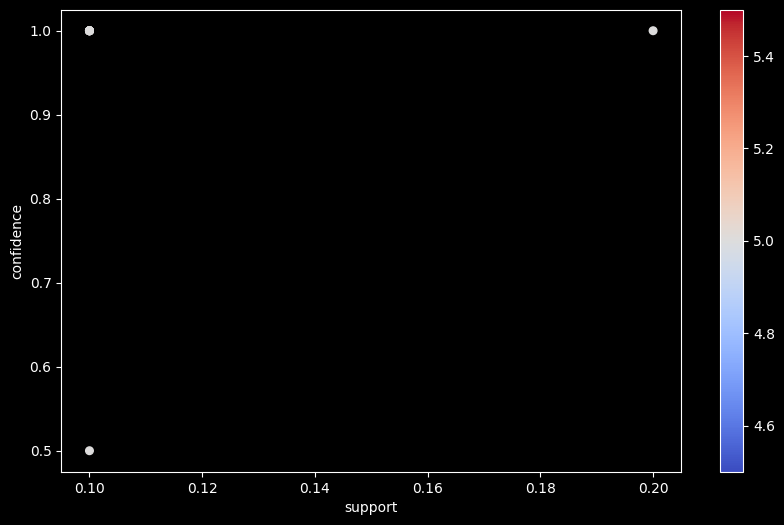

In [31]:
rules10.plot(x = "support", y = "confidence", c = rules10.lift, kind="scatter", s = 30, cmap = plt.cm.coolwarm) #due to similar values the points are overlapping in the plot.

In [ ]:
# Rules with highest lift ratio is more preferred.
# Harry Potter1 can be promoted to a viewer who has watched Harry Potter2.
# If the viewer who has watched Green Mile, Sixth Sense movies then suggesting LOTR would be a good choice.
# Viewer who is interested in fantasy movies like Harry Potter1, Green Mile, LOTR1 can also be suggested with LOTR2 movie.
# Many such rules can be considered to understand viewers choice and promote the movies to increase the business.
